In [305]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [271]:
df = pd.read_csv('data.csv', on_bad_lines='skip')
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [272]:
print(f'Length of the Dataset: {len(df)}')

Length of the Dataset: 669640


In [273]:
df = df.dropna()

In [274]:
print(f'Length of the Dataset: {len(df)}')

Length of the Dataset: 669639


In [275]:
df.describe()

,strength
count,669639.000000
mean,0.990198
std,0.507947
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [276]:
df.strength.value_counts()

strength
1    496801
0     89701
2     83137
Name: count, dtype: int64

In [277]:
df.password.shape

(669639,)

In [278]:
class_counts = df['strength'].value_counts()
print("Class distribution before undersampling:")
print(class_counts)

Class distribution before undersampling:
strength
1    496801
0     89701
2     83137
Name: count, dtype: int64


In [279]:
under_sampler = RandomUnderSampler(sampling_strategy={0: 8000, 1: 8000, 2: 8000}, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(df.drop('strength', axis=1), df['strength'])

In [280]:
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['strength'] = y_resampled

In [281]:
df_resampled.head()

,password,strength
221611,73ptilp,0
594416,kalem55,0
221251,aca007,0
500448,nopy98u,0
615462,ac7i5ge,0


In [282]:
list(df_resampled.strength.value_counts())

[8000, 8000, 8000]

In [283]:
df = df_resampled

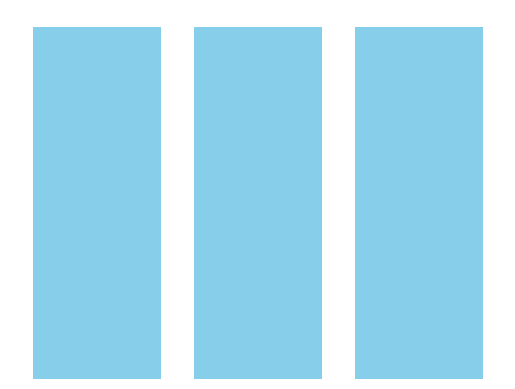

In [284]:
plt.bar(list(set(list(df.strength))),list(df_resampled.strength.value_counts()), color='skyblue')
plt.axis('off')
plt.show()

In [285]:
tokens = ''
for i in list(df.password):
    for j in i:
        if j not in tokens:
            tokens += j

print(tokens)

73ptilkaem5c0noy98ugs16wqz4rvjd2hxbf.TS-±MAYRBCDEÄOLIHJUNK(*)^#ZG PV_[Ù…XWF+;%$Q=&!Ú/<>Ð¤á?ÀºÇ]}³@›¾Ñ‹µœ|~{þ×


In [286]:
char_to_tok = {v:k for k,v in enumerate(sorted(list(tokens), key=lambda x: ord(x)))}
char_to_tok

{'\x05': 0,
 '\x12': 1,
 '\x16': 2,
 '\x17': 3,
 '\x1b': 4,
 '\x1c': 5,
 '\x1e': 6,
 ' ': 7,
 '!': 8,
 '#': 9,
 '$': 10,
 '%': 11,
 '&': 12,
 '(': 13,
 ')': 14,
 '*': 15,
 '+': 16,
 '-': 17,
 '.': 18,
 '/': 19,
 '0': 20,
 '1': 21,
 '2': 22,
 '3': 23,
 '4': 24,
 '5': 25,
 '6': 26,
 '7': 27,
 '8': 28,
 '9': 29,
 ';': 30,
 '<': 31,
 '=': 32,
 '>': 33,
 '?': 34,
 '@': 35,
 'A': 36,
 'B': 37,
 'C': 38,
 'D': 39,
 'E': 40,
 'F': 41,
 'G': 42,
 'H': 43,
 'I': 44,
 'J': 45,
 'K': 46,
 'L': 47,
 'M': 48,
 'N': 49,
 'O': 50,
 'P': 51,
 'Q': 52,
 'R': 53,
 'S': 54,
 'T': 55,
 'U': 56,
 'V': 57,
 'W': 58,
 'X': 59,
 'Y': 60,
 'Z': 61,
 '[': 62,
 ']': 63,
 '^': 64,
 '_': 65,
 'a': 66,
 'b': 67,
 'c': 68,
 'd': 69,
 'e': 70,
 'f': 71,
 'g': 72,
 'h': 73,
 'i': 74,
 'j': 75,
 'k': 76,
 'l': 77,
 'm': 78,
 'n': 79,
 'o': 80,
 'p': 81,
 'q': 82,
 'r': 83,
 's': 84,
 't': 85,
 'u': 86,
 'v': 87,
 'w': 88,
 'x': 89,
 'y': 90,
 'z': 91,
 '{': 92,
 '|': 93,
 '}': 94,
 '~': 95,
 '\x7f': 96,
 '¤': 97,
 '±': 

In [287]:
df['max_len'] = df.password.apply(lambda x : len(x))

In [288]:
max(df.max_len)

147

In [289]:
df.loc[df.max_len == 147]

,password,strength,max_len
237921,n43sSh567hDjJ678Fj5D857I6j58SjJ876F89762k3liyU...,2,147


In [290]:
def preprocess(text):
    L = []
    for i in list(text):
        L.append(char_to_tok[i])
    for _ in range(len(L),147):
        L.append(-1)
    return L

In [291]:
df['X'] = df.password.apply(lambda x : preprocess(x))

In [292]:
len(df)

24000

In [293]:
df.head()

,password,strength,max_len,X
221611,73ptilp,0,7,"[27, 23, 81, 85, 74, 77, 81, -1, -1, -1, -1, -..."
594416,kalem55,0,7,"[76, 66, 77, 70, 78, 25, 25, -1, -1, -1, -1, -..."
221251,aca007,0,6,"[66, 68, 66, 20, 20, 27, -1, -1, -1, -1, -1, -..."
500448,nopy98u,0,7,"[79, 80, 81, 90, 29, 28, 86, -1, -1, -1, -1, -..."
615462,ac7i5ge,0,7,"[66, 68, 27, 74, 25, 72, 70, -1, -1, -1, -1, -..."


In [294]:
xtrain,xtest,ytrain,ytest = train_test_split(
    df.X.values,
    df.strength,test_size=0.3
)
xtrain

array([list([41, 69, 71, 79, 71, 73, 21, 21, 20, 26, 21, 29, 27, 26, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
       list([72, 90, 86, 77, 66, 27, 23, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

In [295]:
X_train_2d = np.stack(xtrain)
X_test_2d = np.stack(xtest)

In [296]:
X_train_2d,X_test_2d

(array([[41, 69, 71, ..., -1, -1, -1],
        [72, 90, 86, ..., -1, -1, -1],
        [78, 74, 76, ..., -1, -1, -1],
        ...,
        [84, 66, 74, ..., -1, -1, -1],
        [41, 44, 54, ..., -1, -1, -1],
        [46, 71, 76, ..., -1, -1, -1]]),
 array([[66, 88, 83, ..., -1, -1, -1],
        [67, 83, 88, ..., -1, -1, -1],
        [76, 70, 70, ..., -1, -1, -1],
        ...,
        [76, 84, 70, ..., -1, -1, -1],
        [45, 86, 66, ..., -1, -1, -1],
        [52, 85, 43, ..., -1, -1, -1]]))

In [297]:
d_model = DecisionTreeClassifier()

In [298]:
d_model.fit(X_train_2d,ytrain)

DecisionTreeClassifier()

In [299]:
y_pred = d_model.predict(X_test_2d)

In [300]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2377
           1       1.00      1.00      1.00      2372
           2       1.00      1.00      1.00      2451

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



In [301]:
knn = KNeighborsClassifier(n_neighbors=3)

In [302]:
knn.fit(X_train_2d,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [303]:
y_pred = d_model.predict(X_test_2d)

In [304]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2377
           1       1.00      1.00      1.00      2372
           2       1.00      1.00      1.00      2451

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



In [306]:
rf = RandomForestClassifier()

In [307]:
rf.fit(X_train_2d,ytrain)

RandomForestClassifier()

In [308]:
y_pred = rf.predict(X_test_2d)

In [309]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2377
           1       1.00      1.00      1.00      2372
           2       1.00      1.00      1.00      2451

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200

